### Conversion Rate
#### Goal
Optimizing conversion rate is likely the most common work of a data scientist, and rightfully so.
The data revolution has a lot to do with the fact that now we are able to collect all sorts of data
about people who buy something on our site as well as people who don't. This gives us a
tremendous opportunity to understand what's working well (and potentially scale it even further)
and what's not working well (and fix it).
The goal of this challenge is to build a model that predicts conversion rate and, based on the
model, come up with ideas to improve re]enue.
This challenge is significantly easier than all others in this collection. There are no dates, no
tables to join, no feature engineering required, and the problem is really straightforward.
Therefore, it is a great starting point to get familiar with data science takehome challenges.
You should not move to the other challenges until you fully understand this one.

### Challenge Description
We have data about users who hit our site: whether they converted or not as well as some of
their characteristics such as their country, the marketing channel, their age, whether they are
repeat users and the number of pages visited during that session (as a proxy for site
activity/time spent on site).

###### Your project is to:

- Predict conversion rate
- Come up with recommendations for the product team and the marketing team to
improve conversion rate


### Data:
#### Columns:
- country : user country based on the IP address
- age : user age. Self-reported at sign-in step
- new_user : whether the user created the account during this session or had already an account and simply came back to the site
- source : marketing channel source
- Ads: came to the site by clicking on an advertisement
- Seo: came to the site by clicking on search results
- Direct: came to the site by directly typing the URL on the browser
- total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
- converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions/ total sessions.

Let's import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Explore the dataset a little bit

In [2]:
CR = pd.read_csv('conversion_data.csv')

In [3]:
CR.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
CR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
CR.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
CR['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

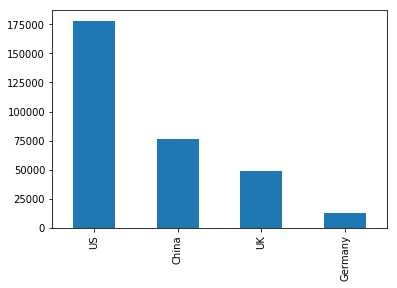

In [7]:
CR['country'].value_counts().plot.bar()

#### It looks like it is a US page, although there are non-english speaking visitors as well.

### Let's analyze the min, mean and max ages by country

In [8]:
DR=CR.groupby('country')

In [9]:
DR.min()

,age,new_user,source,total_pages_visited,converted
country,,,,,
China,17,0,Ads,1,0
Germany,17,0,Ads,1,0
UK,17,0,Ads,1,0
US,17,0,Ads,1,0


In [10]:
DR.mean()

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.449985,0.677237,5.190717,0.062500
UK,30.451538,0.679835,5.082167,0.052632
US,30.566482,0.681985,4.930160,0.037801


In [11]:
DR.max()

,age,new_user,source,total_pages_visited,converted
country,,,,,
China,69,1,Seo,26,1
Germany,123,1,Seo,27,1
UK,111,1,Seo,27,1
US,79,1,Seo,29,1


#### It seems that visitors to the page are adults mostly. Although, maximum ages for Germany and UK seem unrealistic!

#### The 123 and 111 age values seem unrealistic. Let's print the list of unique values of ages.

In [12]:
A=list(CR['age'].unique())

In [13]:
A.sort()

In [14]:
print(A)

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123]


#### looks like there is a gap between 79 and 111. It is indicative of outliers. Let's plot the histogram

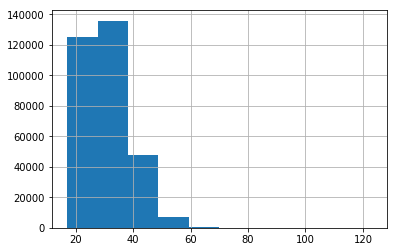

In [15]:
CR['age'].hist()

#### How many values larger than 79 there are?

In [16]:
len(CR[CR['age']>79])

2

They look like outliers, since they are only two values we can remove them

In [17]:
New_data = CR[CR['age']< 80]

In [18]:
len(CR), len(New_data)

(316200, 316198)

#### Now, let's look at the conversion by country

In [19]:
grouped=New_data.groupby('country')

Text(0, 0.5, 'Average Conversion Rate')

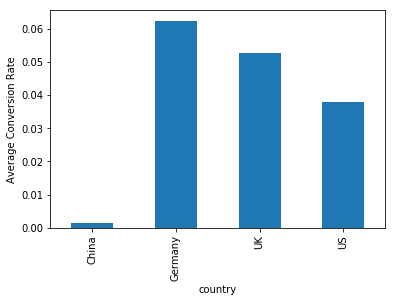

In [20]:
grouped.mean()['converted'].plot.bar()
plt.ylabel('Average Conversion Rate')

In [21]:
#### Conversion rate in industry is around 3%

#### It seems like China has a lower rate of conversion compared users from other countries. Let's check the amounts of people who converted (1) and not-converted(0) by country.

In [22]:
grouped['converted'].value_counts()

country  converted
China    0             76500
         1               102
Germany  0             12240
         1               815
UK       0             45900
         1              2549
US       0            171360
         1              6732
Name: converted, dtype: int64

#### Now, let's analyze the data by the number of pages the user visited

In [23]:
pages_visited = New_data.groupby('total_pages_visited')

In [24]:
pages_visited.mean().head()

,age,new_user,converted
total_pages_visited,,,
1,30.711701,0.703601,0.000000
2,30.701673,0.699188,0.000228
3,30.690251,0.699035,0.000251
4,30.729572,0.696730,0.000780
5,30.629476,0.694475,0.001570


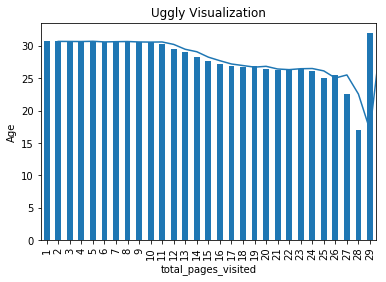

In [25]:
pages_visited.mean()['age'].plot.line()
pages_visited.mean()['age'].plot.bar()
_=plt.ylabel('Age')
_=plt.title('Uggly Visualization')

#### It seems that older users visit fewer pages (they are less patient) than younger users. We could also plot the maximum ages:

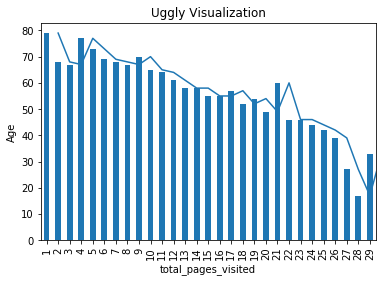

In [26]:
pages_visited.max()['age'].plot.line()
pages_visited.max()['age'].plot.bar()
_=plt.ylabel('Age')
_=plt.title('Uggly Visualization')

#### Oldies spend less time surfing the web!

Another way to plot the same information would be like this. Using seaborn library.

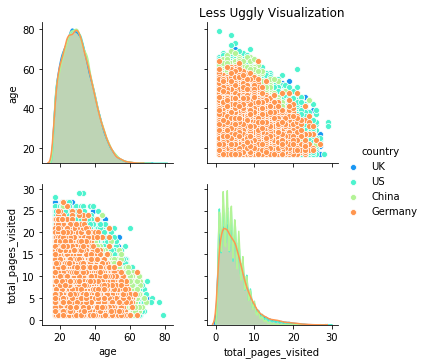

In [27]:
import seaborn as sns
sns.pairplot(New_data[['age','total_pages_visited', 'country']],hue='country',palette='rainbow')
plt.title('Less Uggly Visualization')
plt.show()

#### Now, let's analyze how "conversion" and "total_pages_visited" are related:

Text(0, 0.5, 'Average Conversion Rate')

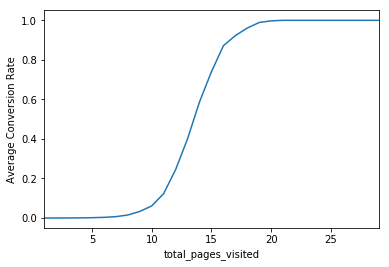

In [28]:
_=pages_visited.mean()['converted'].plot()
plt.ylabel('Average Conversion Rate')

### It looks like the most visited pages, the higher the conversion rate!. 
Definitely spending more time on the site implies higher probability of conversion!

# Conclusions:  
### What are your conclusions?
### What about nationality, age, etc...?

### What measures you would implement to improve your conversion rate?
### would you target a specific group (age, country?)

#### I did not analyze the SEO (search engine optimization) variable, You should!. It can be important.

# NOTE:
## Visualization can be highly improved by using another libraries like seaborn or plotly service as we shall see in future lessons!

# -----------------------------------------------------------

# Continuation

# Machine Learning


## Let’s now build a model to predict conversion rate. Outcome is binary and you care about insights to give product and marketing team project ideas. You should probably choose among the following options:

Logistic regression

Decision Trees

Random Forest or Boosted Decision Trees in combination with partial dependence plots

It is good to add two lines to explain why you chose a given approach.

Ex: I am going to pick a random forest to predict conversion rate. I picked a random forest because: it usually requires very little time to optimize it (its default params are often close to be the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables. I will use the random forest to predict conversion, then I will use its partial dependence plots and variable importance to get insights. Also, I will build a simple tree to find the most obvious user segments. 


### First, let’s create dummy variables from the categorical ones:

In [35]:
#dummy variables for the categorical ones
data_dummy = pd.get_dummies(CR, drop_first=True)

In [45]:
data_dummy.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [46]:
data_dummy.shape

(316200, 9)

Create test/training set with a standard 70% split (if the data were too small, I would cross-validate). Then, I build the forest with standard values for the 3 important parameters (100 trees, trees as large as possible, 3 random variables selected at each split).



In [47]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(11)

#### split into train and test

In [49]:
train, test = train_test_split(data_dummy, test_size = 0.30)

### build the model

In [50]:
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('converted', axis=1), train['converted'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

### let's print OOB accuracy and confusion matrix

Nota: OOB (out-of-bag) error is a special error used in ML methods that uses Bagging (like random forest)... more on Bagging on the slides ;)

In [51]:
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)


OOB accuracy is 0.9842866178729557 
 OOB Confusion Matrix 
         0     1
0  213093  1138
1    2341  4768


- [TN FP]
-  [FN TP]

Remember accuracy is
- Acc = Total Correct Predictions / Total data, or equivalent
- Acc = (TP + TN) / (TP + FP +TN +FN)

In [52]:
(213092+4816)/(213092+4816+2308 +1124)

0.9844944429384657

In [53]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(test.drop('converted', axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop('converted', axis=1)), labels=[0, 1]))
)

Test accuracy is 0.9846932321315623 
 Test Set Confusion Matrix 
        0     1
0  91333   436
1   1016  2075


So, OOB error and test error are pretty similar. We are confident we are not overfitting.

Error is pretty low. However, we started from a 97% accuracy (that’s the case if we classified everything as a “non converted”). So, ~98.6% is good, but nothing shocking. Indeed, 30% of conversions are predicted as “non conversion”.

In [57]:
print(CR['converted'].value_counts())
print(str(306000/(306000+10200)*100) + " %")

0    306000
1     10200
Name: converted, dtype: int64
96.7741935483871 %


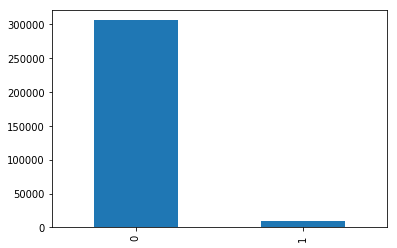

In [58]:
_=CR['converted'].value_counts().plot.bar()

## That's why accuracy is not a good metric for unbalanced datasets!!!

In [59]:
rfc_pred=rf.predict(test.drop('converted', axis=1))
print(classification_report(test['converted'],rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91769
           1       0.83      0.67      0.74      3091

   micro avg       0.98      0.98      0.98     94860
   macro avg       0.91      0.83      0.87     94860
weighted avg       0.98      0.98      0.98     94860



Recall (or TPR or ensitivity) is a better metric when data is unbalanced

If we cared about the very best possible accuracy or specifically minimizing false positive/false negative, we would find the best cut-off point. The default 0.5 cutoff value used internally by the random forest to make the prediction.

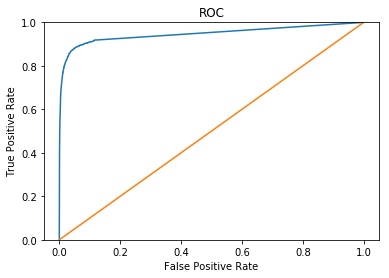

In [60]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#Let's get false positive rate and true positive rate and plot them in the ROC
pred_prob=rf.predict_proba(test.drop('converted', axis=1))[:,1]
fpr, tpr, thresholds = roc_curve(test['converted'],pred_prob)
#plot
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

a cut-off of 0.8 would be better

If we want to be a bit more accurate, we can use the approach of maximizing true positive rate - false positive rate, this is the same as maximizing (1-class1_error) - class0_error. 

In [61]:
error_cutoff=pd.DataFrame({'cutoff':pd.Series(thresholds),
                               'class0_error':pd.Series(fpr),
                               'class1_error': 1 - pd.Series(tpr)
                                })
error_cutoff['optimal_value'] = 1 - error_cutoff['class1_error'] - error_cutoff['class0_error']
print(error_cutoff.sort_values('optimal_value', ascending=False).head(1))

        cutoff  class0_error  class1_error  optimal_value
1588  0.036895      0.052948      0.115173       0.831879


In [62]:
# But, how to train the model with that threshold??  HOMEWORK

If you care about insights, building a model is just the first step. You need to check that the model predicts well and, if it does, you can now extract insights out of it.

Let’s start by checking variable importance (predictive power):

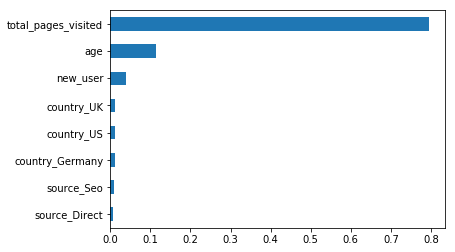

In [63]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop('converted', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

Total pages visited is the most important one, by far. Unfortunately, it is probably the least “actionable”. People visit many pages because they already want to buy. Also, in order to buy, you have to click on multiple pages. Let’s rebuild the RF without that variable. Since classes are heavily unbalanced and we don’t have that very powerful variable anymore, let’s change the weights, just to make sure we will get something classified as 1.



In [64]:
#build the model without total_pages_visited
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, class_weight={0:1, 1:10})
rf.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])
  
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.899286166079335 
 OOB Confusion Matrix 
         0      1
0  196096  18135
1    4157   2952


Note: That is one strategy for dealing with unbalanced datasets, assigning different weights to classes.
Another strategy is to undersampling or oversampling using SMOTE or other strategy, for example GAN's, but it can "salir más caro el caldo que las albondigas"...   

In [65]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(test.drop(['converted', 'total_pages_visited'], axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop(['converted', 'total_pages_visited'], axis=1)), labels=[0, 1]))
)

Test accuracy is 0.8983133038161502 
 Test Set Confusion Matrix 
        0     1
0  83920  7849
1   1797  1294


Accuracy went down, but that’s fine. The model is still good enough to give us insights.

Let’s recheck variable importance:



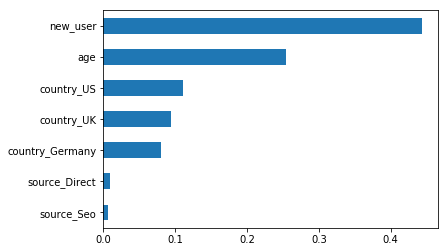

In [66]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['converted', 'total_pages_visited'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

Interesting! New user is the most important one, even more important than age. And that’s impressive given that continuous variables tend to always show up at the top in RF variable importance plots. It means new_user is really important. Source-related dummies don’t seem to matter at all.

#### Let’s check partial dependence plots for the 4 vars:

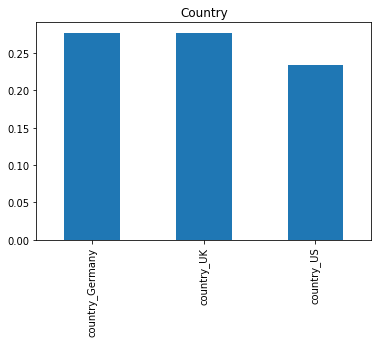

In [68]:
# pip install pdpbox
from pdpbox import pdp, info_plots
  
#country
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature=['country_Germany', 'country_UK', 'country_US'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Country')
plt.show()

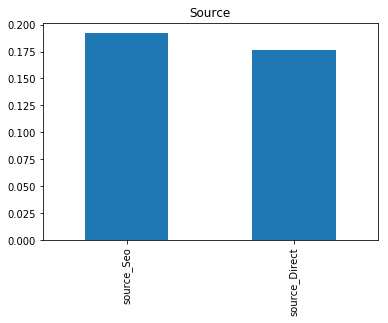

In [69]:
#source
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature=['source_Direct', 'source_Seo'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Source')
plt.show()

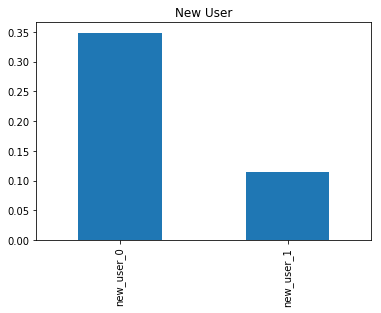

In [70]:
#new user
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='New User')
plt.show()


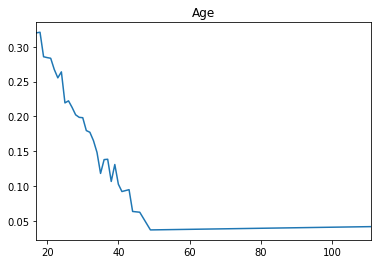

In [71]:
#age
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='age', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Age')
plt.show()

This shows that:

Users with an old account are much better than new users

Germany, UK, and US are similar, with Germany being the best. Most importantly, they all have very very high values. As usual, we have to read this as relative to the reference level, which is China. So this means that not being from China and being from any of those 3 countries significantly increases the probability of conversion. That is, China is very bad for conversion

The site works very well for young people and gets worse for older people

Source is less relevant



#### Let’s now build a simple decision tree and check the 2 or 3 most important segments:



In [73]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
  
tree = DecisionTreeClassifier( max_depth=2,class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
tree.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])
  
#visualize it
export_graphviz(tree, out_file="tree_conversion.dot", feature_names=train.drop(['converted', 'total_pages_visited'], axis=1).columns, proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()


'tree_conversion.dot.pdf'

# Conclusions and next steps

- What are your conclusions?
- Any suggestion for the company?

The site is working very well for young users. Definitely let’s tell marketing to advertise and use channels which are more likely to reach young people.

The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.

Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.

Maybe go through the UI and figure out why older users perform so poorly? From ~30 y/o conversion clearly starts dropping. A good actionable metric here is conversion rate for people >=30 yr old. Building a team whose goal is to increase that number would be interesting.

Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, or maybe some payment issue. Given how many users are based in China, fixing this should be a top priority. Huge opportunity. 


As you can see, ideas usually end up being about:

Identify segments that perform well, but have low absolute count (like Germany). Then tell marketing to get more of those people

Tell product to fix the experience for the bad performing segments

Bad performing segments with high absolute count (like China) usually provide the biggest opportunities for massive gains, if you can guess why that’s happening and then build a test to validate your hypothesis